In [1]:
#!pip install neuralprophet

In [2]:
import matplotlib.pyplot as plt
#import geopandas as gpd
from neuralprophet import NeuralProphet

In [3]:
import pandas as pd
import numpy as np
import pickle

In [4]:
#uploading a spreadsheet of earthquakes
Quake18 = pd.read_excel(r"C:\Users\yelsk\Desktop\programming\Projects DS\Equake\quakes2018.xls")

In [5]:
#defining a 0th row to column headers
Quake18.columns = Quake18.iloc[0]

#deleting columns with no coordinates and no magnitude
Quake18 = Quake18.dropna(subset=['Lat', 'Long'], how='all')
Quake18 = Quake18.dropna(subset=['Md', 'Mb', 'Mw'], how='all')

#droping  felt column
del Quake18['Felt']
Quake18.head(4)

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
0,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea


In [6]:
#droping  0th row - containing column names
Quakeplt=Quake18.drop(labels=0, axis=0)
Quakeplt.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea


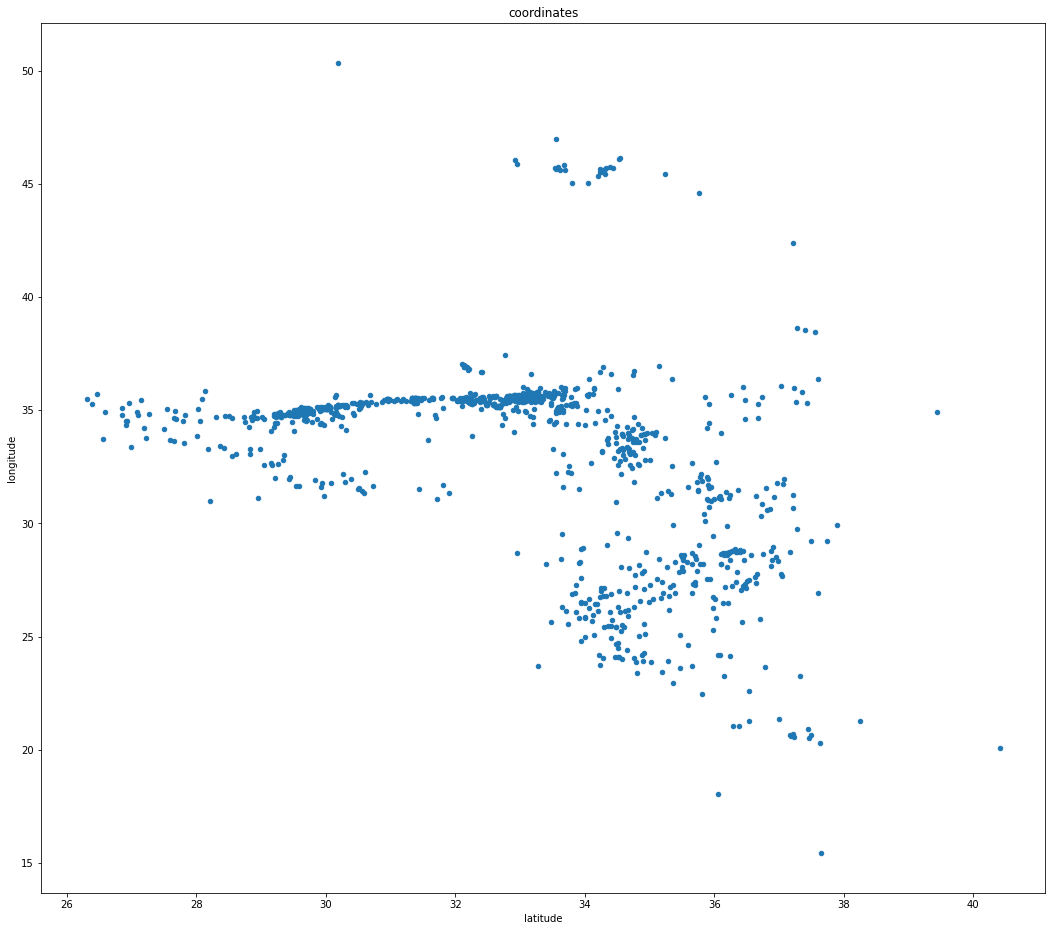

In [7]:
#plotting earthquake's locations
Quakeplt.plot(kind='scatter', x='Lat', y='Long', figsize=(18, 16))
plt.title('coordinates')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

In [8]:
#list of all region names in a dataframe
Quakeplt['Region'].unique()

array(['E.Mediter.Sea', 'Hula-Kinneret', 'Turkey', 'Roum', nan, 'Arava',
       'Carmel-Tirza', 'Iraq', 'Yamune', 'Galilee', 'Jordan-valley',
       'Egypt', 'Cyprus', 'E.Shomron', 'Judea-Samaria', 'Arif-fault',
       'Dead-Sea-Basin', 'Red-Sea', 'Suez', 'W.sirhan', 'Eilat-Deep',
       'Central-Israel', 'Sinai', 'Aragonese_Deep', 'East-Sinai',
       'Barak-fault', 'Palmira', 'Saudi-Arabia', 'Lebanon', 'W.Sirhan',
       'Syria', 'Negev', 'Sharon', 'Thamad', 'Northen-Jordan',
       'Paran-fault', 'Aragonese-Deep', 'Jordan-Valley', 'Jordan',
       'Arnona-Dakar-Deep', 'arava'], dtype=object)

In [9]:
# earthquakes in 'arava' and 'jordan valley' regions
Quake_aravajordanvalley=Quakeplt.loc[Quakeplt['Region'].isin(['Arava','Jordan-valley'])]

#only earthquakes in a dead sea region
Quake_DS=Quakeplt.loc[Quakeplt['Region']=='Dead-Sea-Basin']
Quake_DS.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region
88,2018,2,1,17,20,58.5,NaN,NaN,1.7,2,30.965,35.3953,Dead-Sea-Basin
100,2018,2,5,1,38,37.1,NaN,NaN,1.4,8,31.5136,35.5269,Dead-Sea-Basin
115,2018,2,10,4,19,42.5,2.3,NaN,2.4,21,31.1,35.5186,Dead-Sea-Basin
170,2018,2,26,20,9,24.4,NaN,NaN,1.1,24,31.2394,35.4168,Dead-Sea-Basin
226,2018,3,19,11,36,32.6,NaN,NaN,1.1,17,31.1592,35.4171,Dead-Sea-Basin


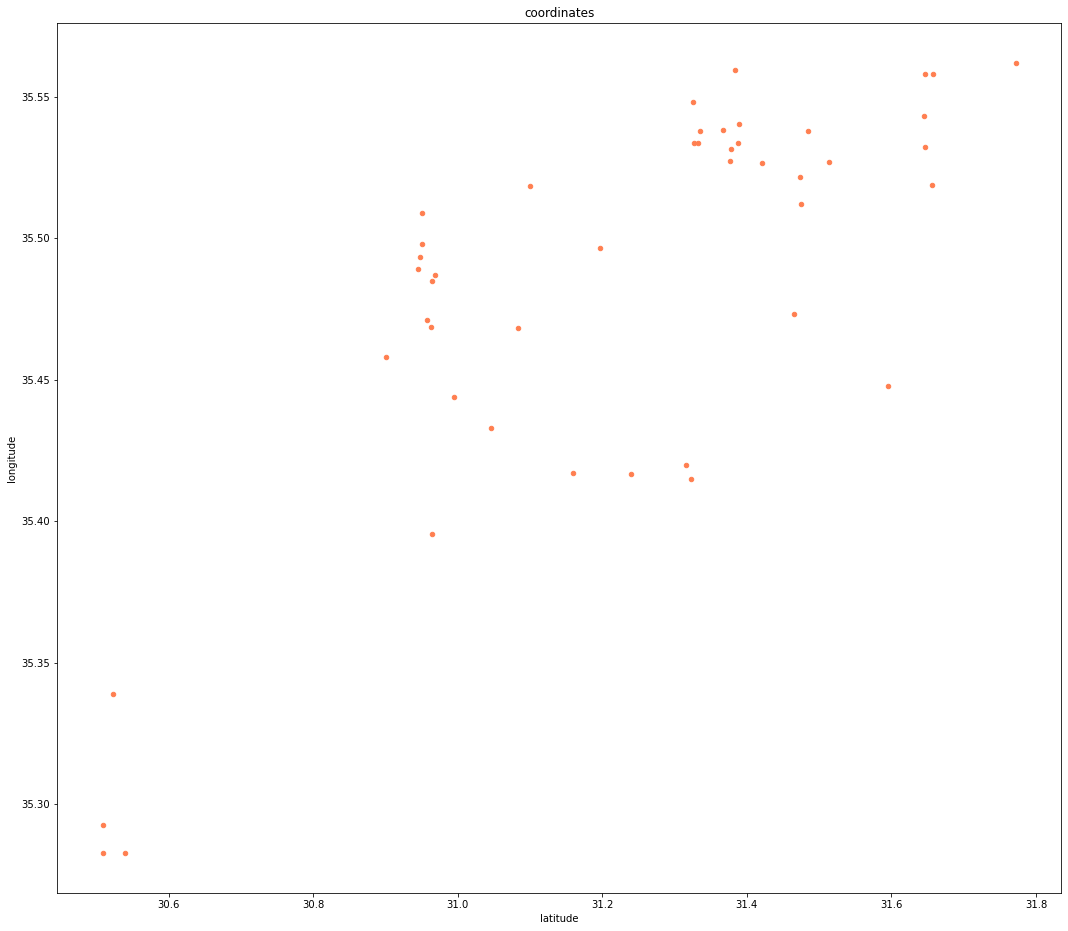

In [10]:
#plotting earthquake's locations of dead sea valley
Quake_DS.plot(kind='scatter', x='Lat', y='Long',figsize=(18, 16),c='coral')
#Quake_aravajordanvalley
plt.title('coordinates')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.show()

In [11]:
#time column from 'Hour', 'Min', 'Sec' columns
Quakeplt['Time'] = Quakeplt['Hour'].astype(str) + ':' + Quakeplt['Min'].astype(str) + ':' + Quakeplt['Sec'].apply(np.floor).astype(str) #round seconds down

#creating timesatnps out of 'Year', 'Month', 'Day', 'Hour', 'Min', 'Sec' columns
Quakeplt['Datetime'] = pd.to_datetime(Quakeplt[['Day','Month','Year', 'Time']].astype(str).apply(' '.join, 1), format='%d %m %Y %H:%M:%S')
Quakeplt.head()

#to display column names
#Quakeplt.columns

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region,Time,Datetime
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea,12:49:34,2018-01-02 12:49:34
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret,17:10:56,2018-01-02 17:10:56
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea,3:17:18,2018-01-05 03:17:18
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey,4:33:17,2018-01-05 04:33:17
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea,12:58:6,2018-01-05 12:58:06


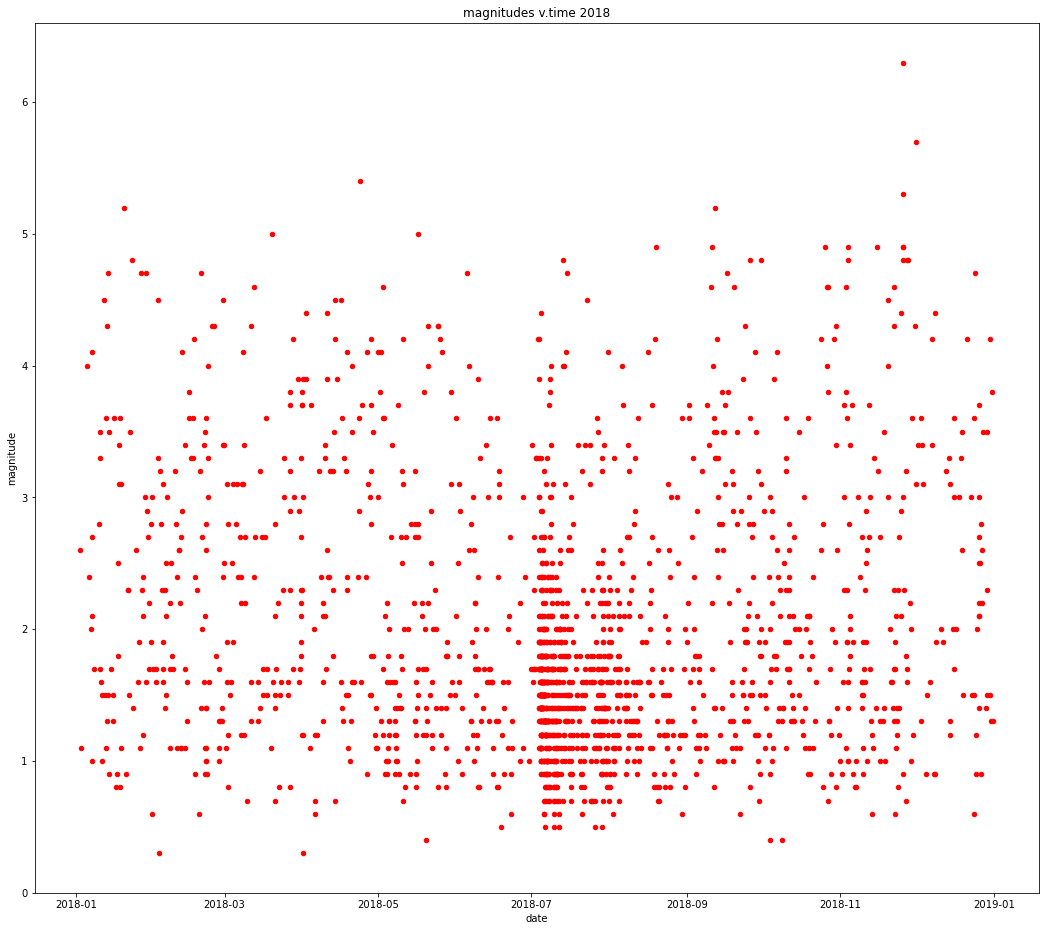

In [12]:
#plotting earthquake's magnitude(Mw) vs time in 2018
Quakeplt.plot(kind='scatter', x='Datetime', y='Mw',figsize=(18, 16),c='red')
plt.title('magnitudes v.time 2018')
plt.xlabel('date')
plt.ylabel('magnitude')

plt.show()

In [13]:
#all earthquakes (not only arave even though the name has _Ar in it)
Quake_Ar=Quakeplt
##only earthquakes in Arava/(dead sea) region
#Quake_Ar=Quakeplt.loc[Quakeplt['Region']=='Arava']
Quake_Ar.head()

,Year,Month,Day,Hour,Min,Sec,Md,Mb,Mw,Depth,Lat,Long,Region,Time,Datetime
2,2018,1,2,12,49,34.8,NaN,NaN,2.6,80,33.6434,29.5461,E.Mediter.Sea,12:49:34,2018-01-02 12:49:34
3,2018,1,2,17,10,56.3,NaN,NaN,1.1,17,32.9713,35.6112,Hula-Kinneret,17:10:56,2018-01-02 17:10:56
4,2018,1,5,3,17,18.6,3.4,NaN,NaN,3,35.6572,28.7057,E.Mediter.Sea,3:17:18,2018-01-05 03:17:18
5,2018,1,5,4,33,17.9,NaN,NaN,4,10,36.8857,28.3754,Turkey,4:33:17,2018-01-05 04:33:17
6,2018,1,5,12,58,6.3,3.4,NaN,NaN,0,35.6587,28.2143,E.Mediter.Sea,12:58:6,2018-01-05 12:58:06


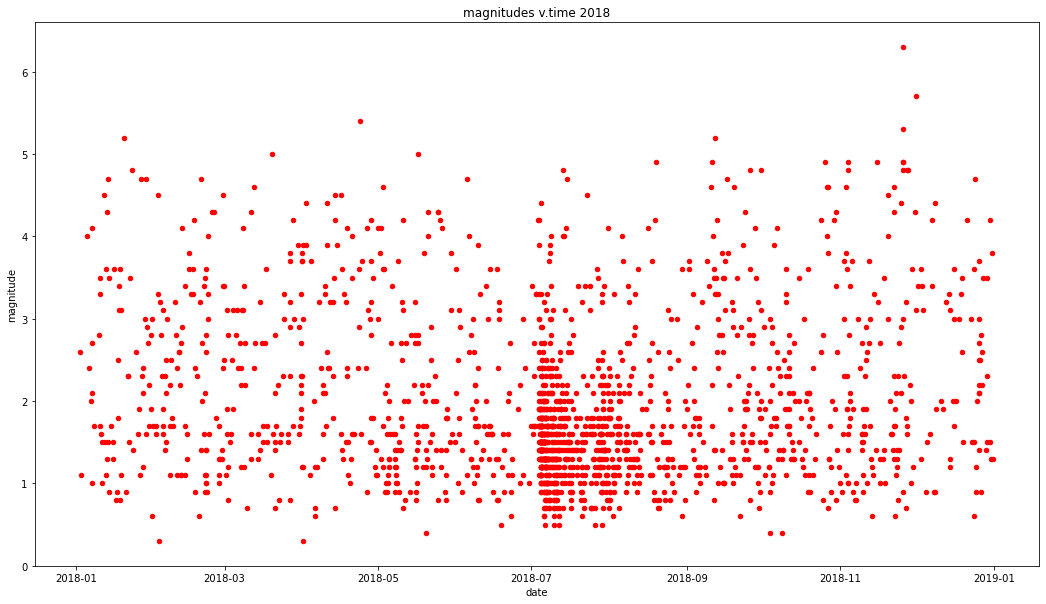

In [14]:
#plotting earthquake's magnitude(Mw) vs time in 2018 of dead sea basin
Quake_Ar.plot(kind='scatter', x='Datetime', y='Mw',figsize=(18, 10),c='red')
plt.title('magnitudes v.time 2018')
plt.xlabel('date')
plt.ylabel('magnitude')

plt.show()

In [15]:
#checking data types in a dataframe
Quake_Ar.dtypes

0
Year                object
Month               object
Day                 object
Hour                object
Min                 object
Sec                 object
Md                  object
Mb                  object
Mw                  object
Depth               object
Lat                 object
Long                object
Region              object
Time                object
Datetime    datetime64[ns]
dtype: object

In [16]:
#creaing a db for neural prophet to use later
npForArava=Quake_Ar[['Datetime', 'Mw']]
npForArava.dropna(inplace=True)
#changing the column names to meat Neuralprophet's expectations/requirments
npForArava.columns=['ds', 'y']
npForArava.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\yelsk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
2,2018-01-02 12:49:34,2.6
3,2018-01-02 17:10:56,1.1
5,2018-01-05 04:33:17,4
7,2018-01-06 00:07:14,2.4
9,2018-01-06 19:21:12,2


In [17]:
#creating a new instance of our model - untrained
mod=NeuralProphet()
# train the model (freq='D'= daily frequency)
mod.fit(npForArava, freq='D', epochs=100)

WARNING - (py.warnings._showwarnmsg) - C:\Users\yelsk\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.18E-02, min: 5.30E-01


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.18E-02, min: 8.53E-01


  0%|          | 0/262 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.52E-02, min: 7.28E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.29E-02
Epoch[100/100]: 100%|██████████| 100/100 [00:19<00:00,  5.12it/s, SmoothL1Loss=0.0296, MAE=0.715, RMSE=0.915, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.749265,4.401135,5.447433,0.0
1,0.694269,4.169936,5.185638,0.0
2,0.611433,3.816174,4.768717,0.0
3,0.491586,3.297268,4.149530,0.0
4,0.339831,2.612684,3.282786,0.0
...,...,...,...,...
95,0.029693,0.716097,0.914322,0.0
96,0.029626,0.715266,0.915126,0.0
97,0.029597,0.715084,0.914538,0.0
98,0.029587,0.715150,0.913331,0.0


In [18]:
#forcasting after we trained our model
futurequ=mod.make_future_dataframe(npForArava, periods=50)
forcastQ=mod.predict(futurequ)
forcastQ.tail()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
45,2019-02-15 19:10:59,None,2.712491,NaN,2.950852,-0.062182,-0.17618
46,2019-02-16 19:10:59,None,2.769271,NaN,2.957749,-0.012298,-0.17618
47,2019-02-17 19:10:59,None,2.998534,NaN,2.964646,0.210068,-0.17618
48,2019-02-18 19:10:59,None,2.807605,NaN,2.971542,0.012242,-0.17618
49,2019-02-19 19:10:59,None,2.709491,NaN,2.978439,-0.092768,-0.17618


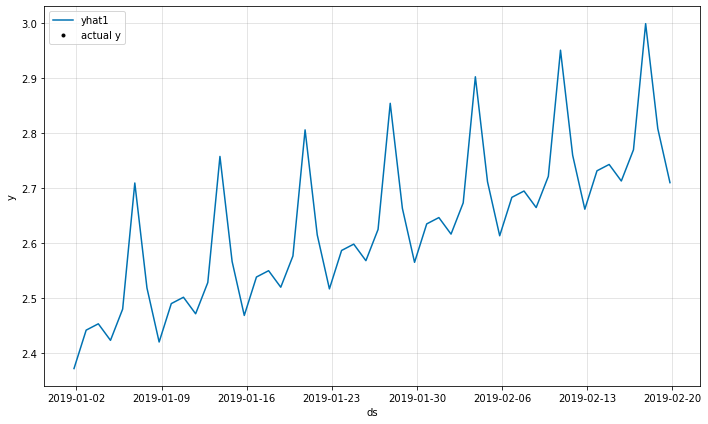

In [19]:
plot1=mod.plot(forcastQ)

In [20]:
#dave dataframe as excel file for creating power bi dashboard
forcastQ.to_excel('forcastQ.xlsx')

In [21]:
#another model for validation from npForArava dataframe
model=NeuralProphet()
npForArava_train, npForArava_test=model.split_df(npForArava, valid_p=0.1, freq='D')


In [22]:
#training and validation metrics
train_metrics=model.fit(npForArava_train, freq='D')
test_metrics= model.test(npForArava_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.41E-02, min: 1.05E+00


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.61E-02, min: 1.05E+00


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.26E-02, min: 6.47E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.74E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:21<00:00,  7.43it/s, SmoothL1Loss=0.0301, MAE=0.678, RMSE=0.872, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.068  1.024  1.330


In [23]:
test_metrics

,SmoothL1Loss,MAE,RMSE
0,0.068111,1.024294,1.329664


It seems like those stats are very good. After looking for some kind of leakage and not finding it, I suspect that the reason is that the Mw values I'm trying to fit are small (mostly between 1.5 and 2), and therefore the errors are less then 1 (and even less so while squared). to test that I will try to predict values 10 times bigger then Mw and then see if the metrics show much bigger errors.

In [24]:
#creating dataframe with 10X the value of Mw
np_10_ForArava= npForArava[['ds', 'y']]
np_10_ForArava['y']=np_10_ForArava['y']*10
np_10_ForArava.head()


,ds,y
2,2018-01-02 12:49:34,26.0
3,2018-01-02 17:10:56,11.0
5,2018-01-05 04:33:17,40.0
7,2018-01-06 00:07:14,24.0
9,2018-01-06 19:21:12,20.0


In [25]:
# model for validation from np_10_ForArava dataframe
model_10=NeuralProphet()
np_10_ForArava_train, np_10_ForArava_test=model.split_df(np_10_ForArava, valid_p=0.1, freq='D')

#training and validation metrics
train_metrics=model_10.fit(np_10_ForArava_train, freq='D')
test_metrics= model_10.test(np_10_ForArava_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 160


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.41E-02, min: 2.15E+00


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.87E-02, min: 1.44E+00


  0%|          | 0/260 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.41E-02, min: 1.33E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.56E-02
Epoch[160/160]: 100%|██████████| 160/160 [00:20<00:00,  7.77it/s, SmoothL1Loss=0.0301, MAE=6.79, RMSE=8.77, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.068 10.224 13.255


In [26]:
#exploring values in my dataframe
#np_10_ForArava['y'].min()
np_10_ForArava_test['ds'].max()
#np_10_ForArava_train['ds'].max()

Timestamp('2018-12-31 19:10:59')

In [27]:
#Saving our model with Pickle
with open ('eq_forcast_model.pkl', "wb") as f:
    pickle.dump(model_10, f)

In [28]:
#reload the model
with open ('eq_forcast_model.pkl', "rb") as f:
    m=pickle.load(f)

In [29]:
m

In [30]:
#check if our model indeed have the same metrics:  0.050  4.018  5.378 --which indeed it does:)
test_metrics= m.test(np_10_ForArava_test)


INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.068 10.224 13.255


Plotting and trying to forcast the location (North-South) of the earthquake

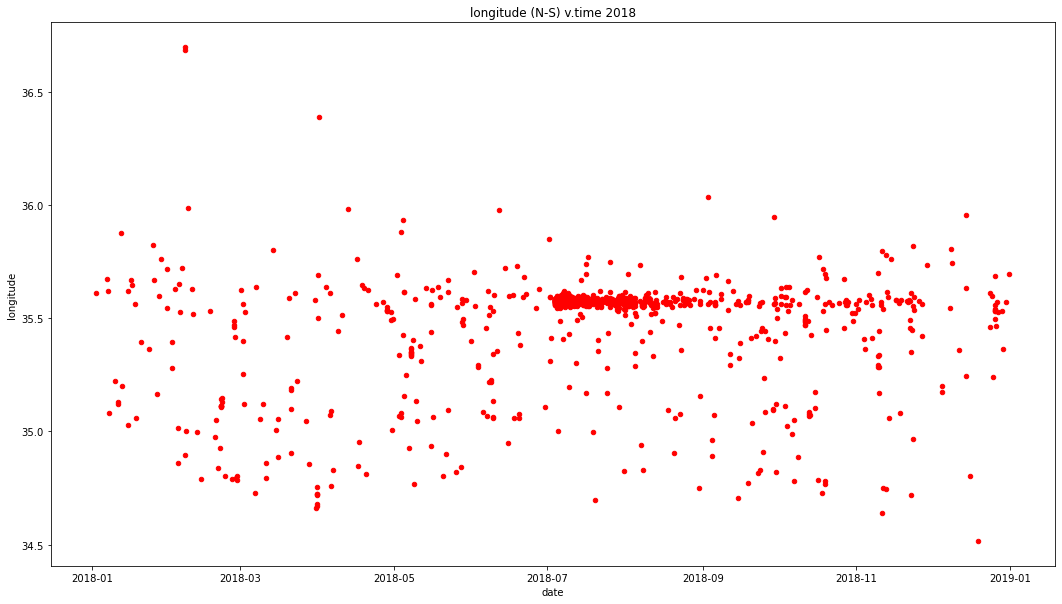

In [36]:
##DF only earthquakes along Dead Sea fault region
Quake_DSR=Quakeplt.loc[Quakeplt['Region'].isin (['Yamune', 'Lebanon', 'Roum', 'Hula-Kinneret', 'Jordan-Valley', 'E.Shomron', 'Dead-Sea-Basin', 'Arava', 'arava', 'Barak-fault', 'W.sirhan', 'Eilat-Deep', 'Aragonese_Deep', 'Arnona-Dakar-Deep'])]
Quake_DSR.head()

#plotting earthquake's magnitude(Mw) vs time in 2018 of dead sea basin
Quake_DSR.plot(kind='scatter', x='Datetime', y='Long',figsize=(18, 10),c='red')
plt.title(r'longitude (N-S) v.time 2018')
plt.xlabel('date')
plt.ylabel('longitude')

plt.show()

In [39]:
#creaing a db for neural prophet to use later
npForDSR=Quake_DSR[['Datetime', 'Long']]
npForDSR.dropna(inplace=True)
#changing the column names to meat Neuralprophet's expectations/requirments
npForDSR.columns=['ds', 'y']
npForDSR.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\yelsk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
3,2018-01-02 17:10:56,35.6112
9,2018-01-06 19:21:12,35.6748
14,2018-01-07 06:58:51,35.6191
16,2018-01-07 21:37:37,35.0804
19,2018-01-10 05:37:52,35.2222


In [49]:
#creating a new instance of our model - untrained
model=NeuralProphet()
# train the model (freq='D'= daily frequency)
npForDSR_train, npForDSR_test=model.split_df(npForDSR, valid_p=0.1, freq='D')

#training and validation metrics
train_metrics=model.fit(npForDSR_train, freq='D')
test_metrics= model.test(npForDSR_test)

INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 178


  0%|          | 0/251 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.79E-02, min: 8.87E-01


  0%|          | 0/251 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.75E-02, min: 8.87E-01


  0%|          | 0/251 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.88E-02, min: 1.24E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.75E-02
Epoch[178/178]: 100%|██████████| 178/178 [00:18<00:00,  9.79it/s, SmoothL1Loss=0.0182, MAE=0.104, RMSE=0.177, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.057  0.289  0.328


In [52]:
test_metrics

,SmoothL1Loss,MAE,RMSE
0,0.057439,0.288792,0.32792


In [50]:
#forcasting after we the model was trained
futurequ=model.make_future_dataframe(npForDSR, periods=50)
forcastQ=model.predict(futurequ)
forcastQ.tail()

,ds,y,yhat1,residual1,trend,season_weekly,season_daily
45,2019-02-15 19:10:59,None,35.068790,NaN,35.077515,0.003790,-0.012511
46,2019-02-16 19:10:59,None,35.049599,NaN,35.075211,-0.013101,-0.012511
47,2019-02-17 19:10:59,None,35.062599,NaN,35.072910,0.002200,-0.012511
48,2019-02-18 19:10:59,None,35.064034,NaN,35.070610,0.005935,-0.012511
49,2019-02-19 19:10:59,None,35.035088,NaN,35.068310,-0.020708,-0.012511


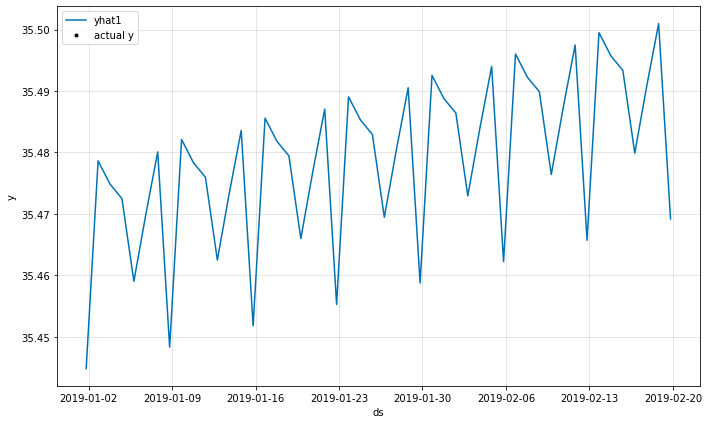

In [43]:
plot1=mod.plot(forcastQ)

In [53]:
#dave dataframe as excel file for creating power bi dashboard
forcastQ.to_excel('forcastDSR.xlsx')

NameError: name 'npForDSR_train' is not defined